In [1]:
import pytorch_lightning as pl
from pytorch_lightning.callbacks.early_stopping import EarlyStopping
from tqdm.auto import tqdm, trange
from ipywidgets import IntProgress
import time
from torch import nn
from torch.nn import functional as F
from torchmetrics.functional.regression import mean_absolute_percentage_error
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, '../ml')
from NGO import *
from VarMiON import *
from DataModule import *
from logger import *
from trainer import train
from customlosses import *

In [2]:
data_dir = '../../../trainingdata/HC2D_NGO_VarMiONpapersettings_theta05'

hparams = {'accelerator': 'gpu',
           'devices': [0],
           'dtype': torch.float64,
           'precision': 64,
           'loss_terms': [F.mse_loss],
           'loss_coeffs': [1],
           'metric': L2_scaled,
           'optimizer': torch.optim.Adam, 
           'learning_rate': 1e-4,
           'batch_size': 100,
           'max_epochs': 5000,
           'early_stopping_patience': 1000000,
           'VarMiON': True,
           'Q': 100,
           'Q_L': 268,
           'h': 72, 
           'bias_NLBranch': False,
           'bias_LBranch': False,
           'NLB_outputactivation': nn.Tanhshrink(),
           'Cholesky': False,
           'scale_invariance': True,
           'norm_basis': False,
           'bound_mus': False,
           '1/theta': False,
           'symgroupavg': False,
           'NOMAD': False}

In [3]:
datamodule = DataModule_hc2d(data_dir, hparams)

In [4]:
datamodule.setup()

Preprocessing data...


In [5]:
s = 2

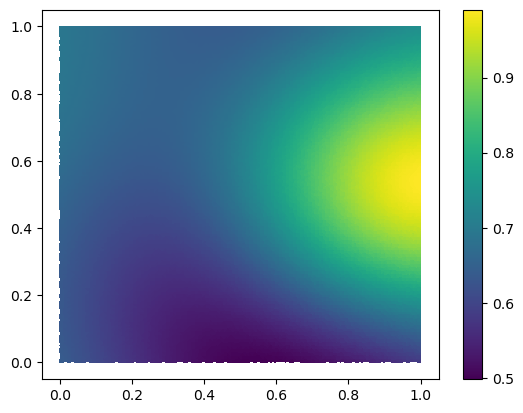

In [6]:
X, Y = np.mgrid[0:1:100*1j, 0:1:100*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T

plt.tripcolor(x_i[:,0], x_i[:,1], datamodule.theta_raw[s](x_i))
plt.colorbar()

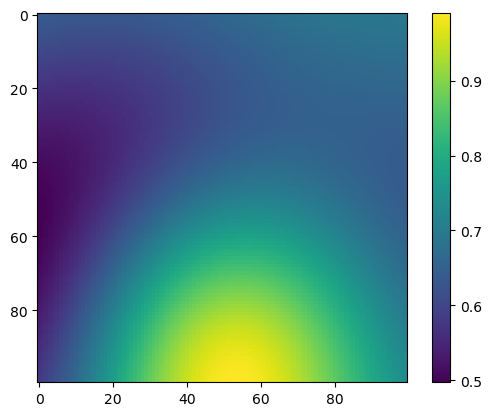

In [7]:
X, Y = np.mgrid[0:1:hparams['Q']*1j, 0:1:hparams['Q']*1j]
x_i = np.vstack([X.ravel(), Y.ravel()]).T

plt.imshow(datamodule.theta[s])
plt.colorbar()

In [8]:
datamodule.u_raw.shape

(10000, 4096)

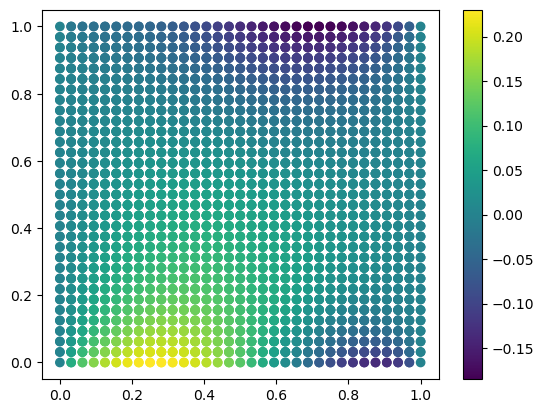

In [9]:
plt.scatter(datamodule.x_raw[s,:,0],datamodule.x_raw[s,:,1], c=datamodule.u_raw[s])
plt.colorbar()

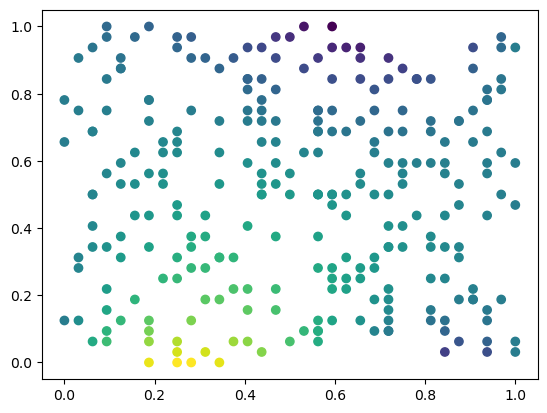

In [10]:
plt.scatter(datamodule.x[s,:,0],datamodule.x[s,:,1], c=datamodule.u[s])

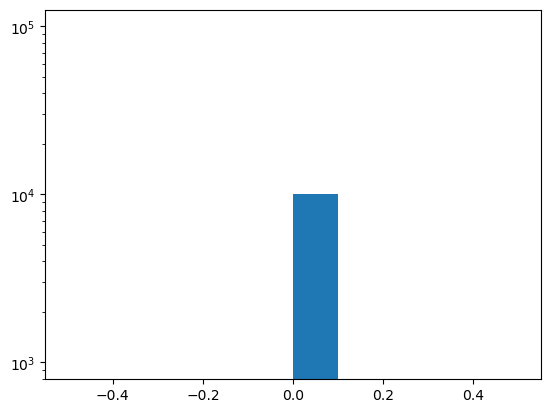

In [11]:
plt.hist(torch.sum(datamodule.theta<0, axis=(-2,-1)))
plt.yscale('log')